In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame(pd.read_pickle("../liquidity_provider_data/wpls_steth.pkl"))

In [2]:
data.head()

,contract_address,event_name,topics,data,block_number,transaction_hash,transaction_index,block_hash,log_index,transaction_from_address,transaction_to_address,transaction_gas,transaction_gas_price
0,0xEFe14ed5fc8Fa9C3bD87cd3E0017235BcccF763e,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x0000000000000000000000000000000000000000003a...,17247058,0x7905b1dfb03ce4fa3caa339c04496880357967ee33c0...,14,0x80409e8ff1f45d5aa9d4457f972c021c18ae2ec32963...,199,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8
1,0xEFe14ed5fc8Fa9C3bD87cd3E0017235BcccF763e,Swap,[0xd78ad95fa46c994b6551d0da85fc275fe613ce37657...,0x00000000000000000000000000000000000000000039...,17247058,0x7905b1dfb03ce4fa3caa339c04496880357967ee33c0...,14,0x80409e8ff1f45d5aa9d4457f972c021c18ae2ec32963...,200,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8
2,0xEFe14ed5fc8Fa9C3bD87cd3E0017235BcccF763e,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000000...,17247058,0x7905b1dfb03ce4fa3caa339c04496880357967ee33c0...,14,0x80409e8ff1f45d5aa9d4457f972c021c18ae2ec32963...,207,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8
3,0xEFe14ed5fc8Fa9C3bD87cd3E0017235BcccF763e,Transfer,[0xddf252ad1be2c89b69c2b068fc378daa952ba7f163c...,0x00000000000000000000000000000000000000000002...,17247058,0x7905b1dfb03ce4fa3caa339c04496880357967ee33c0...,14,0x80409e8ff1f45d5aa9d4457f972c021c18ae2ec32963...,208,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8
4,0xEFe14ed5fc8Fa9C3bD87cd3E0017235BcccF763e,Sync,[0x1c411e9a96e071241c2f21f7726b17ae89e3cab4c78...,0x00000000000000000000000000000000000000000c97...,17247058,0x7905b1dfb03ce4fa3caa339c04496880357967ee33c0...,14,0x80409e8ff1f45d5aa9d4457f972c021c18ae2ec32963...,209,0x37C843419218430619464fbea890F609537FabD5,0xe6Df4Ca976F3feC8DA89EfEc332dC2245F0a86Ff,1000000,8


<Axes: ylabel='event_name'>

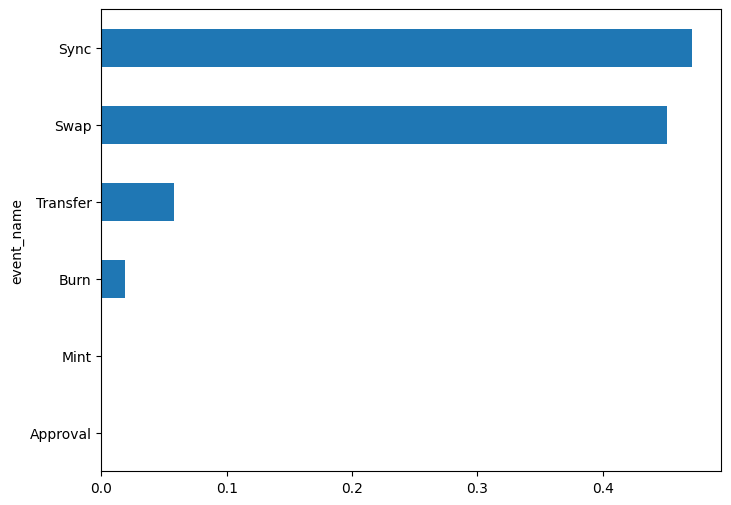

In [3]:
data.value_counts("event_name", normalize=True).sort_values().plot(kind='barh', figsize=(8, 6))

<Axes: xlabel='block_number'>

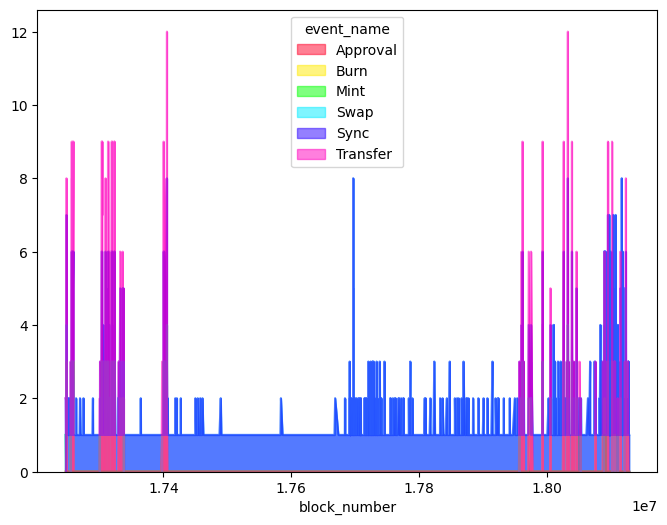

In [5]:
areaplot = data.groupby(['block_number','event_name']).transaction_hash.count().reset_index().pivot(index='block_number', columns='event_name', values='transaction_hash').fillna(0)
areaplot.plot.area(stacked=False, colormap="gist_rainbow",  figsize=(8, 6))

In [9]:
areaplot


event_name,Approval,Burn,Mint,Swap,Sync,Transfer
block_number,,,,,,
17274011,0.0,0.0,1.0,0.0,1.0,2.0
17274468,0.0,0.0,0.0,1.0,1.0,0.0
17274486,0.0,0.0,0.0,1.0,1.0,0.0
17274514,0.0,0.0,0.0,1.0,1.0,0.0
17274529,0.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...
18119620,0.0,0.0,0.0,1.0,1.0,1.0
18119622,0.0,1.0,1.0,4.0,6.0,7.0
18119624,0.0,0.0,0.0,1.0,1.0,0.0
